EMA BackTester

In [6]:
from algobot.BackTester import EMABackTester

In [7]:
tester = EMABackTester("KRW-BTC", count=730)

In [8]:
tester.test_strategy()

(1.674071, 0.047104)

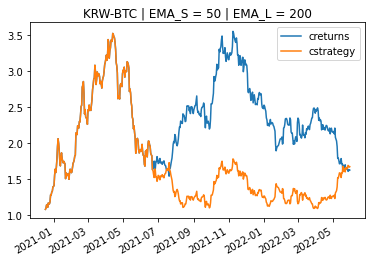

In [9]:
tester.plot_returns()

In [13]:
tester.optimize_parameters((20,50,1), (30,100,1))

(array([24., 41.]), 12.849947)

In [14]:
tester.set_parameters(24, 41)

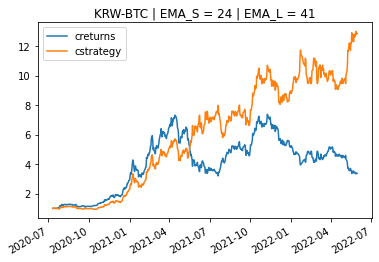

In [15]:
tester.plot_returns()

SMA-EMA Cross BackTester

In [1]:
from algobot.BackTester import CrossSmaEmaBackTester

In [2]:
tester = CrossSmaEmaBackTester("KRW-BTC", count=730, interval="minute10")

In [3]:
tester.test_strategy()

(0.968054, -0.110723)

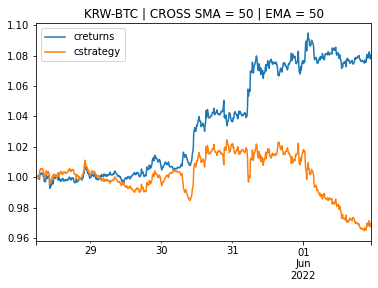

In [4]:
tester.plot_returns()

In [5]:
tester.optimize_parameters((20,100,1))

(65.0, 1.016286)

In [6]:
tester.update_and_run(65)

-1.016286

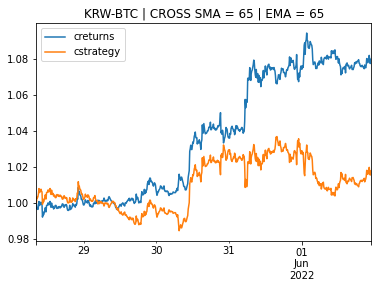

In [7]:
tester.plot_returns()

<AxesSubplot:>

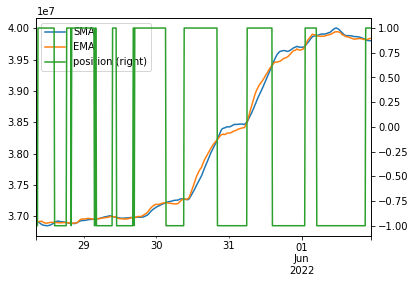

In [8]:
tester.results.loc["2022",["SMA","EMA","position"]].plot(secondary_y="position")

MACD BackTester

In [9]:
from algobot.BackTester import MACDBackTester

In [10]:
tester = MACDBackTester("KRW-BTC", count=730)

In [11]:
tester.test_strategy()

(5.247945, 1.573122)

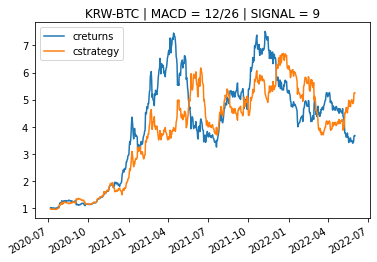

In [12]:
tester.plot_returns()

In [13]:
res = tester.optimize_parameters((10,30,1), (26,100, 1), (5,10,1))
res

(array([23., 78.,  5.]), 10.27751)

In [14]:
tester.set_parameters(23,78,5)

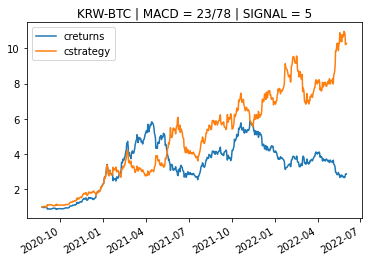

In [15]:
tester.plot_returns()